# Earth Engine 101
This workbook is an introdution to Earth Engine analysis in an IPython Notebook, using the Python API. The content is similar to what is covered in the Introduction to the Earth Engine API workshop using the Earth Engine Javascript "Playground". 

Let's get started by importing a few moduled used in this tutorial.

In [1]:
from IPython.display import Image

## Hello, World
To get used to using IPython Notebooks, let's print some simple output back to the notebook. Click on the box below, and then press the play (run) button from the toolbar above.

In [2]:
print("Hello, world!")

Hello, world!


That works, but we can also first store the content in a variable, and then print out the variable.

In [3]:
string = "Hello, world!"
print(string)

Hello, world!


## Hello, Images
Let's work with something more interesting... a dataset provided by Earth Engine.

Assuming that this server has been setup with access to the Earth Engine Python API, we should be able to import and initialise the Earth Engine Python module (named 'ee'). If the module loads successfully, nothing will be returned when you run the following code.

In [4]:
import ee
ee.Initialize()

Next, let's locate a dataset to display. Start by going to the Earth Engine Public Data Catalog (https://earthengine.google.org/#index). 

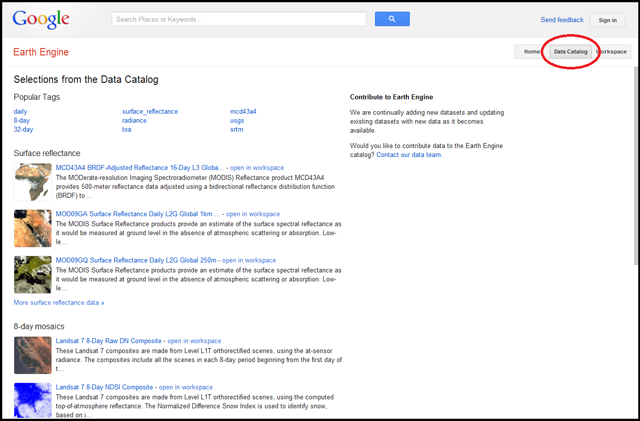

In [5]:
Image('http://www.google.com/earth/outreach/images/tutorials_eeintro_05_data_catalog.png')

Type in the term **SRTM** in the search box, click the search button, and then select the dataset **SRTM Digital Elevation Data Version 4** from the list of results. This will bring up a data description page for the [SRTM Digital Elevation Data 30m](https://earthengine.google.org/#detail/CGIAR%2FSRTM90_V4) dataset. The data description page provide a short description of the dataset and links to the data provider, but the key piece of information that we need for working with the dataset in Earth Engine is the **Image ID**, which for this dataset is **CGIAR/SRTM90_V4**. Let's use the Image ID to store a reference to this image dataset:

In [6]:
srtm = ee.Image("CGIAR/SRTM90_V4")

And now, we can print out information about the dataset, using the .getInfo() method.

In [7]:
info = srtm.getInfo()
print(info)

{u'bands': [{u'crs': u'EPSG:4326', u'crs_transform': [0.000833333333333, 0.0, -180.0, 0.0, -0.000833333333333, 60.0], u'id': u'elevation', u'data_type': {u'max': 32767, u'type': u'PixelType', u'precision': u'int', u'min': -32768}, u'dimensions': [432000, 144000]}], u'version': 1532032424967728, u'type': u'Image', u'id': u'CGIAR/SRTM90_V4', u'properties': {u'system:time_end': 951177600000, u'system:visualization_0_max': u'8000.0', u'thumb': u'https://mw1.google.com/ges/dd/images/SRTM90_V4_thumb.png', u'system:visualization_0_gamma': 1.6, u'provider_url': u'http://srtm.csi.cgiar.org/', u'description': u'<p>The Shuttle Radar Topography Mission (SRTM) digital\nelevation dataset was originally produced to provide consistent,\nhigh-quality elevation data at near global scope. This version\nof the SRTM digital elevation data has been processed to fill data\nvoids, and to facilitate its ease of use.</p><p><b>Bands</b><table class="eecat"><tr><th scope="col">Name</th><th scope="col">Units</th><

What is returned by the .getInfo() command is a Python dictionary. If needed, we could parse out this information and make use of it in our analysis.

## Add an Image to the Map

IPython Notebooks can be used to display an image, using the Image module:

In [8]:
from IPython.display import Image

Image(url=srtm.getThumbUrl())

Ok, we can see the outlines of the continents, but there is not a lot of contrast between different elevation areas. So let's improve upon that, but adding some visualization parameters.

In [9]:
Image(url=srtm.getThumbUrl({'min':0, 'max':3000}))

By default, the **.getThumbUrl()** method returns the entire extent of the image, which in this case is global. We can also specify a region, to show a smaller area.

In [10]:
point = ee.Geometry.Point(-122.0918, 37.422)
region_bay_area = point.buffer(50000).bounds().getInfo()['coordinates']
Image(url=srtm.getThumbUrl({'min':0, 'max':1000, 'region':region_bay_area}))

## Load and Filter an Image Collection
So far we have been working with a single image, but there are also interesting datasets that are distributed as a series of images (such as images collected by satellite). Head back to the [Earth Engine Public Data Catalog](https://earthengine.google.org/#index), search for **landsat 8 toa**, and load up the data description page for the **USGS Landsat 8 TOA Reflectance (Orthorectified)** dataset. The ID for this Image Collection is **LANDSAT/LC8_L1T_TOA**.

In [11]:
# Create a reference to the image collection
l8 = ee.ImageCollection('LANDSAT/LC8_L1T_TOA')
# Filter the collection down to a two week period
filtered = l8.filterDate('2013-05-01', '2013-05-15');
# Use the mosaic reducer, to select the most recent pixel in areas of overlap
l8_image = filtered.mosaic()
# Define a region roughly covering California
point = ee.Geometry.Point(-118, 37)
region_california = point.buffer(500000).bounds().getInfo()['coordinates']
# And finally display the image.
Image(url=l8_image.getThumbUrl({'region':region_california}))

## Playing with Image Bands
Using the default image visualization parameters, that doesn't look like much. So we add some visualization data, to display a true color image.

In [12]:
Image(url=l8_image.getThumbUrl({
    'region':region_california,
    'bands':'B4,B3,B2',
    'min':0,
    'max':0.3
}))

And by changing the bands displayed, we can also display a *false color* image.

In [13]:
Image(url=l8_image.getThumbUrl({
    'region':region_california,
    'bands':'B5,B4,B3',
    'min':0,
    'max':0.3
}))

## Play with Reducing Image Collections
Next expand the date range to cover an entire year, so that there are many overlapping images. We will continue to use the **.mosaic()** reducer, which retains the last (most recent) pixels in areas of image overlap. Clouds are readily apparent.

In [14]:
filtered = l8.filterDate('2013-01-01', '2014-01-01')


### ImageCollection.mosaic Reducer

In [15]:
l8_image = filtered.mosaic()
Image(url=l8_image.getThumbUrl({
    'region':region_california,
    'bands':'B4,B3,B2',
    'min':0,
    'max':0.3
}))

### ImageCollection.median Reducer

In [16]:
l8_image = filtered.median()
Image(url=l8_image.getThumbUrl({
    'region':region_california,
    'bands':'B4,B3,B2',
    'min':0,
    'max':0.3
}))

### ImageCollection.min Reducer

In [17]:
l8_image = filtered.min()
Image(url=l8_image.getThumbUrl({
    'region':region_california,
    'bands':'B4,B3,B2',
    'min':0,
    'max':0.3
}))

### ImageCollection.max Reducer

In [18]:
l8_image = filtered.max()
Image(url=l8_image.getThumbUrl({
    'region':region_california,
    'bands':'B4,B3,B2',
    'min':0,
    'max':0.3
}))